# Analysis of Auction mechanisms

In [1]:
from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
results_filename = "../data/auctions_fog v2__40_8_07-07_22-31-36.json"

with open(results_filename) as file:
    results_data = json.load(file)

In [3]:
auction_results = {}
for model_results in results_data:
    for auction, auction_result in model_results.items():
        if auction == 'model':
            continue
        if auction in auction_results:
            auction_results[auction].append(auction_result)
        else:
            auction_results[auction] = [auction_result]
            
print(f'Number of algorithms: {len(auction_results)}')

Number of algorithms: 4


## Auction results

In [7]:
auction_avg_results = []
for algorithm, results in auction_results.items():
    auction_avg_results.append([
        algorithm,
        np.mean([r['social welfare'] for r in results]), 
        np.mean([r['social welfare percent'] for r in results]), 
        np.mean([r['percentage tasks allocated'] for r in results]),
        np.mean([r['total revenue'] for r in results]),
        np.mean([r['solve time'] for r in results])
    ])
    
auction_df = pd.DataFrame(auction_avg_results, columns=['name', 'social welfare', 'social welfare percent',
                                                        'percentage tasks allocated', 'total revenue', 'solve time'])
auction_df = auction_df.sort_values(by='social welfare', ascending=False)

Text(0.5, 1.0, 'Revenue')

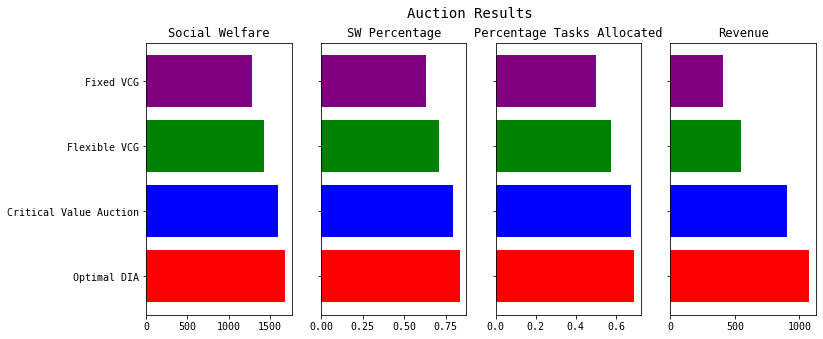

In [21]:
system_fig, (ax_sw, ax_swp, ax_pta, ax_rev) = plt.subplots(1, 4, figsize=(12,5))
system_fig.suptitle('Auction Results', fontsize=14)
colour = ['red', 'blue', 'green', 'purple']

ax_sw.barh(auction_df['name'], auction_df['social welfare'], color=colour)
ax_sw.set_title('Social Welfare')

ax_swp.barh(auction_df['name'], auction_df['social welfare percent'], color=colour)
plt.setp(ax_swp.get_yticklabels(), visible=False)
ax_swp.set_title('SW Percentage')

ax_pta.barh(auction_df['name'], auction_df['percentage tasks allocated'], color=colour)
plt.setp(ax_pta.get_yticklabels(), visible=False)
ax_pta.set_title('Percentage Tasks Allocated')

ax_rev.barh(auction_df['name'], auction_df['total revenue'], color=colour)
plt.setp(ax_rev.get_yticklabels(), visible=False)
ax_rev.set_title('Revenue')

## DIA vs Critical Value Auction Task Price Difference